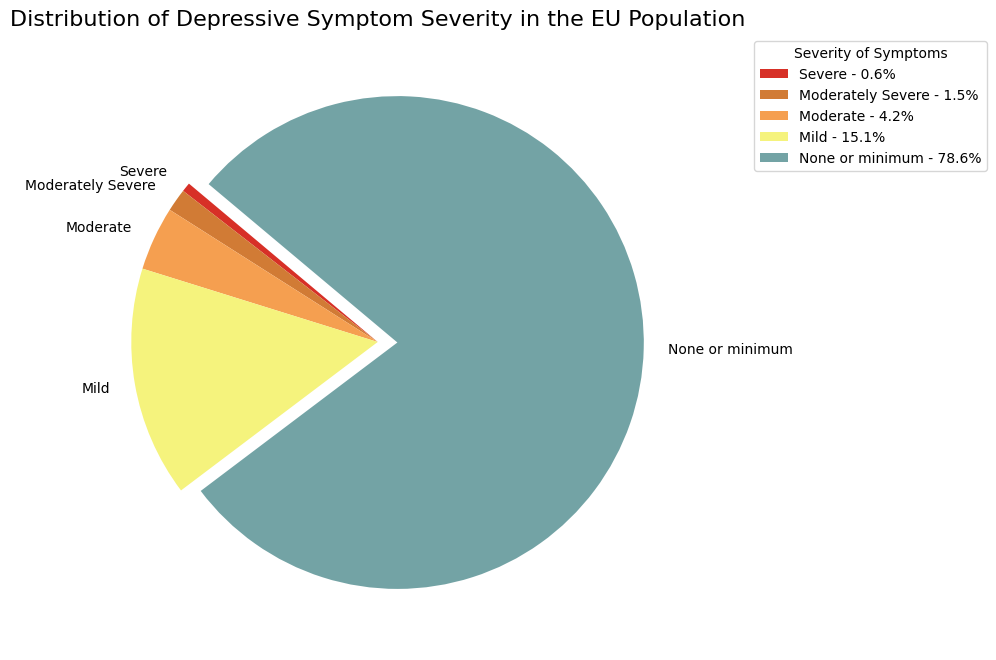

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Carica il dataset
file_path = "Dataset\eu_symptoms_severity.csv"
df = pd.read_csv(file_path)

# Filtra i dati solo per UE27 e anno 2019
df_eu27 = df[
    (df["Geopolitical entity (reporting)"] == "European Union - 27 countries (from 2020)") &
    (df["TIME_PERIOD"] == 2019)
]

# Estraggo sintomi e valori
labels = df_eu27["levels"].values
values = df_eu27["OBS_VALUE"].values


rename_map = {
    "SEV": "Severe",
    "MODS": "Moderately Severe",
    "MOD": "Moderate",
    "MILD": "Mild",
    "NONE_MIN": "None or minimum"
}

order = ["Severe","Moderately Severe", "Moderate", "Mild", "None or minimum"]

# Crea una mappa valori {nome -> percentuale}
valori_map = {rename_map[row["levels"]]: row["OBS_VALUE"] for _, row in df_eu27.iterrows()}


# Etichette e valori
labels = [lab for lab in order]
values = [valori_map[lab] for lab in order]

# Explode
explode = [0.08 if lab == "None or minimum" else 0 for lab in labels]

custom_colors = ["#d73027","#d17b35", "#f59f50", "#f5f37d", "#73A3A5"]

# Grafico a torta
plt.figure(figsize=(8,8))
plt.pie(
    values,
    labels=labels,
    autopct=None,
    startangle=140,
    colors=custom_colors,
    explode=explode
)

# Aggiunta di legenda esterna
plt.legend([f'{l} - {s}%' for l, s in zip(labels, values)], title="Severity of Symptoms", bbox_to_anchor=(1, 0, 0.5, 1))


plt.title("Distribution of Depressive Symptom Severity in the EU Population", fontsize=16)
plt.show()